Dataset

Slope(m): 0.046402590931738916
Intercept(b): 2.6910812157448873

Actual vs Predicted
Actual :105.00, Predicted: 104.78
Actual :40.00, Predicted: 39.81

Mean Absolute Error :0.20503238664673873
r2 score :0.9999598873156736

Predicted price for 1800 sqft house: 86.22 lakhs


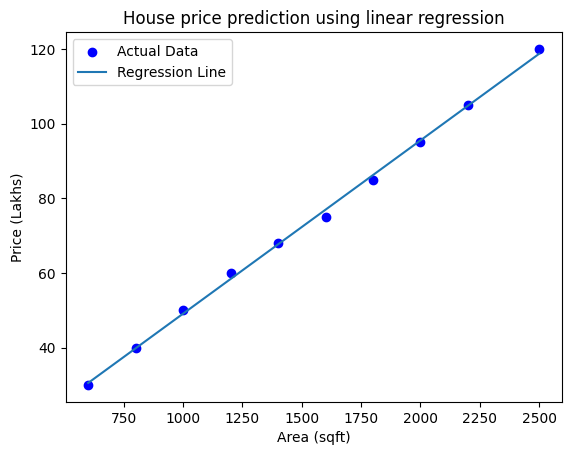

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

data = {
    "area":[600,800,1000,1200,1400,1600,1800,2000,2200,2500],
    "price":[30,40,50,60,68,75,85,95,105,120]   # in lakhs
}

df = pd.DataFrame(data)
print('Dataset')

x = df[['area']]
y = df['price']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

model = LinearRegression()
model.fit(x_train,y_train)

print("\nSlope(m):",model.coef_[0])
print("Intercept(b):",model.intercept_)

y_pred = model.predict(x_test)

print("\nActual vs Predicted")
for actual, pred in zip(y_test,y_pred):
    print(f"Actual :{actual:.2f}, Predicted: {pred:.2f}")

mean_error = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"\nMean Absolute Error :{mean_error}")
print(f"r2 score :{r2}")

new_area = pd.DataFrame([[1800]],columns=['area'])
predicted_price = model.predict(new_area)

print(f"\nPredicted price for {new_area['area'][0]} sqft house: {predicted_price[0]:.2f} lakhs")

plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(x,model.predict(x),label='Regression Line')
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Lakhs)")
plt.title("House price prediction using linear regression")
plt.legend()
plt.show()